# Toxic comments

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Toxic comments. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [20]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [21]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [40]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
#     fn = '/Users/jeharrahpearl/machine-learning-2/ml_update/ml/final_assignment_1/data/toxiccomments_train.csv'
    toxic_data = pd.read_csv(fn)
    if (not test):
        # add an indicator for any toxic, severe toxic, obscene, threat, insult, or indentity hate
        toxic_data['any_toxic'] = (toxic_data['toxic'] + toxic_data['severe_toxic'] + toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0)
    print("toxic_data is:", type(toxic_data))
    print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in toxic_data:")
    print(toxic_data.dtypes, "\n")
    print("the first 10 rows in toxic_data:")
    print(toxic_data.head(5))
    if (not test):
        print("The rate of 'toxic' Wikipedia comments in the dataset: ")
        print(toxic_data['any_toxic'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 20, alternate_sign=False)
        X_hv = hv.fit_transform(toxic_data.comment_text)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(toxic_data.comment_text)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
        
        
    # function that takes raw data and detects uppercase
    # def token_features(token):
        # #     toxic_data = pd.read_csv(fn)
    #     if token.isdigit():
    #         yield "numeric"
    #     else:
    #         yield "token={}".format(token.lower())
    #         yield "token,pos={},{}".format(token)
    #     if token[0].isupper():
    #         yield "uppercase_initial"
    #     if token.isupper():
    #         yield "all_uppercase"
    #     yield "pos={}".format(part_of_speech)
    
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
    toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")
#     toxic_data['punc_count_2'] = toxic_data['comment_text'].str.count("''")
#     toxic_data['length'] = toxic_data['comment_text'].length()
#     toxic_data[''] = toxic
    


    X_quant_features = toxic_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = toxic_data['any_toxic']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(toxic_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, toxic_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [41]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='./data/toxiccomments_train.csv', my_random_seed=86)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 9 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
any_toxic          bool
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  any_toxic  
0             0        0     

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [42]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 6536, 'TN': 58449, 'FP': 56224, 'FN': 6447, 'Accuracy': 0.509063420442439, 'Precision': 0.1041427660930529, 'Recall': 0.5034275591157668, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [43]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12849, 'TN': 114601, 'FP': 72, 'FN': 134, 'Accuracy': 0.9983862881494016, 'Precision': 0.9944276758764802, 'Recall': 0.9896788107525225, 'desc': 'svm_train'}


### MODEL: logistic regression

In [46]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log', alpha=0.001,l1_ratio=0.015, max_iter=1000)
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12837, 'TN': 114568, 'FP': 105, 'FN': 146, 'Accuracy': 0.9980337782791251, 'Precision': 0.9918868799258229, 'Recall': 0.9887545251482708, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12738, 'TN': 105797, 'FP': 8876, 'FN': 245, 'Accuracy': 0.9285501660713167, 'Precision': 0.5893402424354585, 'Recall': 0.9811291689131941, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [48]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron', alpha=0.0001)
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 12892, 'TN': 114594, 'FP': 79, 'FN': 91, 'Accuracy': 0.9986682960456226, 'Precision': 0.9939094904016652, 'Recall': 0.9929908341677578, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [49]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 12983, 'Neg': 114673, 'TP': 10805, 'TN': 114560, 'FP': 113, 'FN': 2178, 'Accuracy': 0.9820533308265965, 'Precision': 0.9896501190694267, 'Recall': 0.832242162828314, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Pos': 12983, 'Neg': 114673, 'TP': 0, 'TN': 114673, 'FP': 0, 'FN': 12983, 'Accuracy': 0.8982969856489315, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_train'}


/Users/jeharrahpearl/Desktop/machine-learning-2/ml_update/ml/final_assignment_1/my_measures.py:25: RuntimeWarning: invalid value encountered in long_scalars
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


### ROC plot to compare performance of various models and fits

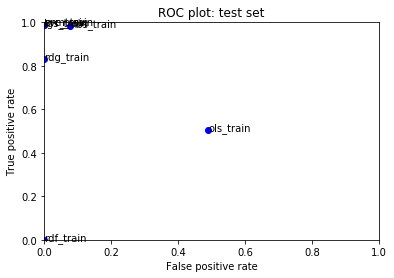

In [51]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

### let's look at some false positives:

In [52]:
ols_predictions = ols.predict(X_train)

In [53]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['any_toxic'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['comment_text'])
                print('* * * * * * * * * ')


Examples of false positives:
9
@ Marshall Bagramyan
you are incorrect, because Kars, Iğdır and the other cities in the western Armenia were part of Ottoman Empire until Russo-Turkish War. Armenians captured eastern Anatolia, and Turkish Army fought for its towns. It is NOT an invasion, but liberation. The article should be named as Turkish-Armenian War. You present your anti-Turk, fascist view here, rather than being objective.
* * * * * * * * * 
22
"
Thank you all
Thank you all for the fond farewells, I appreciate them dearly. It is my birthday today and I have momentarily returned to the Wikipedia as a ""birthday treat"". I see the Spring holiday article is fairly quiet and things are running smoothly between the editors I'm acquaintanced with. I've noticed your username change as well, AYArktos—good luck with that. I hope I may one day be able to permanently return to the Wikipedia, and until then I bid you all adieu, and I will be enjoying my ""big 18th""! Haha!. — `CRAZY`(lN)`SANE

2070
"

There is no reason we cannot talk about both ""intactivism"" and ""intactivists"".  There is also no reason commonly used jargon phrases cannot have articles of their own.   03:36, 14 Jan 2005 (UTC)"
* * * * * * * * * 
2080
"

 Template:Infobox WRC driver/sandbox 

dHi Pelmeen. I saw your message at WT:RALLY regarding an updated version of the WRC driver infobox template. I've taken a look and I have some suggestions:
 Instead of calling it ""Infobox WRC driver"", we should call it ""Infobox Rally driver"". Although not often, we are beginning to cover drivers from IRC, ERC and other notable rally drivers who aren't WRC drivers.
 There shouldn't be a reason for both of the name= and fullname= fields, one should suffice (This is a fault with the current template, also)
 Instead of calling the next section of the infobox ""World Rally Championship record"", there should be an additional field that the editor can choose options of WRC, IRC, ERC, etc etc so that we can use this inf

4606
"This is above Wikipedia's crystal ball policy. It has 2 singles, an album name and background information. It should not be deleted, because hip hop albums such as ""Detox"" and ""The Return of the heartless monster"" have not been deleted, and they lack both of the above mentioned. We should keep it."
* * * * * * * * * 
4679
17:50, 13 Dec 2004 (UTC)
* * * * * * * * * 
4836
Production is resuming in a few weeks. Read the whole article and you'd know that.
* * * * * * * * * 
4849
"  Would you claim them to be part of the ""ignorant majority?"""
* * * * * * * * * 
4858
"

 Please do not vandalize pages, as you did with this edit to Iris. If you continue to do so, you will be blocked from editing.  —αἰτίας •discussion• "
* * * * * * * * * 
4859
Not really.  Its someone with knowledge of the incident making an account specifically to comment on this page Special:Contributions/Kaynbread
* * * * * * * * * 
4894
Northwest Territories politicians
Hi, 

I used various news paper accounts 

7200
"

 EyeWrish 

Not a problem. (talk) "
* * * * * * * * * 
7247
Expansion would be a good thing. It could go into the reasons for founding Winnipeg Hydro in the first place, that is, trying to get the price of power down from the 20 cents/kwh the private power companies were charging at the time. If this got a little bigger it could take over some of the pre-1961 history from Manitoba Hydro.
* * * * * * * * * 
7309
Yes thanks, I did it again - as have you of course - and now early racing has a grand total of 2 FAs.
* * * * * * * * * 
7355
Indifferent tbf. Not a big wolfslair fan nowadays. Rough House and Kaobon for the win. Waiting on Watson to join UFC.
* * * * * * * * * 
7409
labour friends of israel 

i'm sorry, but if ignorance is defined as 'lacking knowledge of', u r indeed ignorant on this topic. lfi is not a single issue grp and it is not wise to rely on its 'official' summary to give a full and accurate picture of its raison d'etre.
* * * * * * * * * 
7438
"Looks notable t

9612
But... 

The info on the gangs got deleted by somebody, I was trying to undo it! Get it back up, I don't know how 60.242.127.62
* * * * * * * * * 
9633
I already did so by taking a Wikibreak, as per step 2: Disengage For A While. I note with grim certainty that Striver and his POV-pushing colleagues have done no such thing.
* * * * * * * * * 
9646
"the Israeli media use the word ""kidnapped"" all the time. A lot of other media from other countries (e.g. USA Today) use the word ""captured""."
* * * * * * * * * 
9655
"

 Help needed 

Can you help me to copy-edit Jayne Mansfield? The article has good information, but the copy is horrible. (talk • contribs) "
* * * * * * * * * 
9663
Requested move 23 May 2014

:Ramona Lisa →  – The current name, Ramona Lisa, is Carolina Polachek's musical alias and not her true birth name. The overall page about Caroline Polachek's musical career should be aptly titled with her real name, Caroline Polachek. A Caroline Polachek Wikipedia page does exi

11413
"

I have to say this though, as it made me laugh. At some point in this farce, someone pointed me to Wikipedia:Manual of Style/Lead section. What did I find? ""The notability of the article's subject is usually established in the first few sentences."" All I can say is, my version complied with that. Easily. The current version - not so much. Unless there's something about the referee or the half-time score or the fact both teams were undefeated that is extremely relevant here.   "
* * * * * * * * * 
11482
|page=Rob Palmer (footballer)
* * * * * * * * * 
11487
The fact that Azeris are mixed Turkic speaking people that sprung from the Turkish invasion points to the fact that they did not just appear.  They were and are in the location that was Arran that consistent of Albanians, and Iranian tribes.  Furthermore, the fact that the entire area was called Arran, then for some reason was renamed Azerbaijan is another indication that Azeris were not a Turkic speaking group that just l

13446
"

First off you are not a fool, but a voice of reason. You have also not been deceived- there is a mess surrounding what is hoax and what is not. Which no on wants to get a handle on. The only hoax is the guys name being used in a BS frat group- that's is it. 
 
I also really don't know what you want of me, or how I can even help you anymore. The only references that I had was talked about in the American Society of Portrait Artists, that has her portait and a bio, and in the Pucci publication within the ""Roma"" appendage. I have listed both sources. There are also two portraits of her, which I described in the article- I can not write  a better article given the information that I have, than what I have written already- that's it. I thought fashionistas would appreciate the added info about Pucci's roman salon, and I was captivated by her interesting eyes and I thought she was a cool persaonality to talk about, since I was already writing about similar topics and had the sourc

15528
"==Switzerland==
Hello. Could you please join the discussion about the ""Racism and Xenophobia"" section at Talk:Switzerland#Racism and Xenophobia section? Thanks,  "
* * * * * * * * * 
15726
Yawn*. Go tell Tiamut to remove all her anti-Israeli rhetoric from their page then. And what, questioning the morality of Muhammad is wrong? What about the Criticism of Muhammad article? You have absolutely no leg to stand on. I am allowed my opinion on one of histories many tyrants, religious prophet or not. And it isn't effecting my editing - have you checked my edit history? o.O I never get involved with any of this stuff.
* * * * * * * * * 
15801
Yeah yeah yeah, .........STILL HERE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
* * * * * * * * * 
15806
"

 WP:OUTING 

Again, I'm gonna report you, but please stop using personal names.   (talk) "
* * * * * * * * * 
15849
"
{| style=""background-color:#F5FFFA; padding:0;"" cellpadding=""0""
|style=""border:1px solid #084080; bac

18072
Image:==

Don’t know how to edit this in the article:
http://img.mp.pl/articles/artykuly/muko.jpg

==
* * * * * * * * * 
18165
"

 Minnesota Entertainment section 

The section, and the article in general, is starting to attract those who wish to mention their favorite groups or music festivals.  It seems to me that only those artists of truly national stature whose work has stood the test of time should be mentioned Andrews Sisters, Dylan, probably Prince, and a few others.  I would lose the recent additions and maybe a few others, especially given the subsidiary article on Music of Minnesota.  But as you seem to be more ""in tune"" (sorry about that) with the music scene, maybe you could look at the new additions and decide what should stay and what should go.  Thanks.   "
* * * * * * * * * 
18235
"
 I'm not sure if you've gotten the same version as me, but I've posted an updated version of Contrib.java on the Java Sandbox. xd(?!? - help us) "
* * * * * * * * * 
18243
Thanks fo

20828
"

Notability
I have added a notability tag to the article. 
WP:CORP says: An organization is not notable merely because a notable person or event was associated with it. A corporation is not notable merely because it owns notable subsidiaries. The organization or corporation itself must have been discussed in reliable independent sources for it to be considered notable. Examples: If a notable person buys a restaurant, the restaurant does not ""inherit"" notability from its owner. If a notable person joins an organization, the organization does not ""inherit"" notability from its member.
WP:CORPDEPTH says: Deep coverage provides an organization with a level of attention that extends well beyond routine announcements and makes it possible to write more than a very brief, incomplete stub about an organization.........
WP:CORPDEPTH says:  trivial coverage [is not acceptable] such as:
sources that simply report meeting times, shopping hours or event schedules,
the publications of tel

23113
where was the need to stop me and a friend having a quick laugh?
* * * * * * * * * 
23150
"

 Userpage History 

Did someone delete the last few edits before Cyde's protection on your userpage? Was it Danny or Essjay?  Yupigo ? "
* * * * * * * * * 
23220
sky brightness graph 

Albester, where did u get the sky brightness graph from? i'm trying to recreate it for different atmospheres. Any help would be much appreciated. Thanks.
* * * * * * * * * 
23230
"

Roman Catholic Bishop of Worcester

A proposed deletion template has been added to the article Roman Catholic Bishop of Worcester, suggesting that it be deleted according to the proposed deletion process. All contributions are appreciated, but this article may not satisfy Wikipedia's criteria for inclusion, and the deletion notice should explain why (see also ""What Wikipedia is not"" and Wikipedia's deletion policy).  You may prevent the proposed deletion by removing the  notice, but please explain why you disagree with the pro

26027
User categorisation
You were listed on the Wikipedia:Wikipedians/Italy page as living in or being associated with Italy. As part of the Wikipedia:User categorisation project, these lists are being replaced with user categories. If you would like to add yourself to the category that is replacing the page, please visit Category:Wikipedians in Italy for instructions.
* * * * * * * * * 
26073
A Funny Thing Happened on the Way to the Forum
I see a direct connection from this play & film to this brilliant, brief TV series, but does anyone with a reputation for fact checking say it anywhere?
* * * * * * * * * 
26313
My say ... 

Indeed I will, I see this as constructive, would an apology suffice?
* * * * * * * * * 
26345
"
 Okay, it's clear English is your second language. I only got the first part, so I'll respond to that; they aren't real. Pure fantasy. A fairy tale. Myth. Know why? Simply because the fact that there are no archeological or recorded history of a ""Gija Joseon"" or the

28432
"

I'll look at this article more carefully tomorrow, but I'm a little concerned with the use of Kavan to kick off the whole background section. She gives quite a... shall we say ""unique"" interpretation to Falun Gong's reception in China in the early years. I'm not saying she should not be quoted, but using a single source like that to orient the entire issue seems quite out of order. Anyway, historically on these pages we've had our fair share of undue pro-Falun Gong sentiments, so I guess I understand. Let's just try to keep it professional.12345 "
* * * * * * * * * 
28585
Conservative elite

Why do you claim this is a nonsense page?
* * * * * * * * * 
28659
"

 One big red flag in the proposed revision is the weight given to claims that a supernatural event ""could not be verified or denied"", which runs squarely afoul of WP:FRINGE. -   "
* * * * * * * * * 
28724
"

OK then, but don't call it the citizens-initiated referendum, corporal punishment or smacking in the title see

30718
":I concur with the The Elements of Style and N5iln, the possessive should be ""Jobs's""   

"
* * * * * * * * * 
30771
"==Somewhere==
I have added a ""{{prod}}"" template to the article Somewhere, suggesting that it be deleted according to the proposed deletion process. All contributions are appreciated, but I don't believe it satisfies Wikipedia's criteria for inclusion, and I've explained why in the deletion notice (see also ""What Wikipedia is not"" and Wikipedia's deletion policy).  You may contest the proposed deletion by removing the {{dated prod}} notice, but please explain why you disagree with the proposed deletion in your edit summary or on its talk page. Also, please consider improving the article to address the issues raised. Even though removing the deletion notice will prevent deletion through the proposed deletion process, the article may still be deleted if it matches any of the speedy deletion criteria or it can be sent to Articles for Deletion, where it may be 

33808
Please see the RM at Talk:Stawamus (village)#Requested move, and I could list a few RMs and CfDs about Squamish titles also i.e. Squamish BC vs Squamish people/Skwxwu7mesh likewise but for now, unfortunately, that's a DEADHORSE because of all the people not really familiar with either and not in a position to know what the PRIMARYTOPIC is, or just hostile to native names altogether.  All were substantially authored as well as titled by
* * * * * * * * * 
33841
Religion in the Az 

Thanks for the info, I have restored the articles
* * * * * * * * * 
33948
Right, and because Red Power Ranger currently refers to the Red Ranger in Mighty Morphin Power Rangers.
* * * * * * * * * 
33976
help and advice 

seek it here just add on and ill see what we can do and we are also looking for teen strougles and more ways to connect to you! any tips? or ways to orginize our information

my friend is doing a report on us and i was wondering if you new where to find 8thgrade report tips he needs he

36194
If people see all the dollar signs they will know Wikipedia is no fan of Microsoft's evil methods of making money by cheating others with inferior software and destroying competitors. 

If you are one of the people who actually writes Wikipedia, I suggest you add information to the Microsoft article, about how they have cheated people. I know many people have their edits reverted quickly, so I'm not going to bother spending lots of time on edits which will be reverted quickly. My method is fast and effecient - it just takes me a few minutes, and by hitting 20 pages, by the time someone reverts everything, there'll be some passing readers who will see my work and see how Microsoft cheats people.

I'm going to check with SingNet whether they offer shared IPs - if so, I'll sign up for an account with them. I have a friend who uses AOL who would be interested in helping me with this. Perhaps if we have 10 ISPs which use dynamic IPs or IPs shared by thousands of people, and we keep do

39008
. I 'koa tow' to your superior smugness.

Well done
* * * * * * * * * 
39031
For help in replying to posts on your UserTalk Page, please see Help:Using talk pages#Indentation and Wikipedia:Indentation.
* * * * * * * * * 
39149
"Fish-man, hello, and welcome to Wikipedia.  Thank you for taking the time to examine Wikipedia policies and base your arguments for keeping No-boo on them, and also for being polite when making your arguments.  VfD pages really aren't the place for me to be making lengthy arguments, so I'll respond to your points here instead.

First, you should be aware that anonymous users who sign up for accounts just to argue about the article being voted on are still effectively anonymous users, and are still not going to have their votes counted.  At this point I think it is really too late for you to establish a history at Wikipedia that would result in your vote being counted.  Again I refer you to Wikipedia:Deletion_guidelines_for_administrators#Rough_consensus fo

41363
"

 AFD? 

Hi Snowy! I just saw your remark about AFD as a ""court of infinite appeals""... now I haven't looked at it lately, but am I correct that your meaning is that some people are repeatedly AFD'ing something until it ""sticks""? I'd like to know if that has become a problem of late. >Radiant< "
* * * * * * * * * 
41377
"
Great, that would help quite a bit.  I was just preparing to do that next. I will work on Infobox Buddhist biography next.  ―Œ(talk) "
* * * * * * * * * 
41389
Haha. Oh man CrnaGora...I can just see you now, red with rage, flinging your Pokemon cards everywhere:)))
* * * * * * * * * 
41409
typical provocator.. Shah
* * * * * * * * * 
41410
"
I didn't know that template existed. Thanks. Mid (contribs) "
* * * * * * * * * 
41434
"

 Why Merge? 

Greetings. Coming back to this page, I was surprised to see the ""merge"" suggestion still here. Peter is globally recognized. How does one counter the claim this article should merged. Based on what I see on this ta

44654
Hi my name is Sceptre and I am out of the pool due to AIDS
* * * * * * * * * 
44691
P.S thanks Pumpmeup for the advice but it unfortuantley didn't work it;s good to meet another Aussie over the internet.
* * * * * * * * * 
44705
Still searching for more.
* * * * * * * * * 
44721
User:TJ Spyke 
Hi Alkivar! I have just noticed that you have earlier today indefintely blocked TJ Spyke from editing Wikipedia. However, there is currently a discussion going on which is attempting to come to a conclusion about what is the right thing to do in this case. Feel free to contribute to the discussion.
* * * * * * * * * 
44730
Picture 
Just a suggestion, maybe we should move the picture of Jay and Sean up to the main picture of Sean.
* * * * * * * * * 
44772
(ii).  Personal Union of England and Wales (1534-1536).

In 1534, King Henry VIII, was refused a divorce from the Pope.  Henry then decided to break with Rome, and found his own church.  The Church of England (today know as Church of Englan

48155
Your recent edits 

Please do not add inappropriate external links to Wikipedia. Wikipedia is not a mere directory of links nor should it be used for advertising or promotion.  Inappropriate links include (but are not limited to) links to personal web sites, links to web sites with which you are affiliated, and links that exist to attract visitors to a web site or promote a product.  See the external links guideline and spam policies for further explanations of links that are considered appropriate.  If you feel the link should be added to the article, then please discuss it on the article's talk page rather than re-adding it. See the welcome page to learn more about Wikipedia. Thank you.
* * * * * * * * * 
48159
Ok, that is a good idea H. Jonat
* * * * * * * * * 
48322
Recusing 

Are you sure that was in the right section and should have been under Arbitrators views where Steve Smith recused? You haven't signed it either.
* * * * * * * * * 
48465
Please stop adding unreferenced 

50519
reviewed|1=original unblock reason|decline=As per Irishguy's comments below.  It looks like you haven't understood WP:NOR, WP:V, WP:RS, or WP:CITE, and probably not WP:NOT.  Your addition is interesting and shows you have put in some time, but it's not quite ready for Wikipedia.  Please read the policies I've linked to here and rework your contribution.  To other admins, note that it is absolutely not unblock abuse for this user to rework his contributions to add reliable sources and then to re-request an unblock. —
* * * * * * * * * 
50550
"
Lastly, do not use edit summaries that tell people what to do, such as you did on Cathy Scott.  I have reverted your change because you have provided no reason as to why the link should be delinked.  You can't just go around making changes and refuse to explain your reasoning and then tell people to not revert you, it doesn't work like that.— dαlus Contribs "
* * * * * * * * * 
50557
But I also think you should listen to them...

...children

54182
'''xenophobic a highly perjorative term alluding to the White Australian Policy.
* * * * * * * * * 
54187
(That'll show 'em)

Bwa ha ha ha ha ha ha!

tee hee

(giggle)

(snicker)

zzzzzzzzzzzzzzzzzzzzz
* * * * * * * * * 
54229
"
It's with mixed emotions that I am now leaving the Wikipedia Project, as I've got better things to do in real life than spend time here. To , I don't care what you or   now think about me, but I just want to say I went a bid too tad far with the dispute with Dave1185, and I owe you both an apology for ruining your days. I wish you luck on your lives as administrators on the Wikipedia project. If I'm still in your bad-books, and won't forgive me for the actions I've done, then I don't really care. To , It's been great working with you and I wish you the best, and to  and , It's been great asking the both of you for advice when I needed it If I did the wrong thing and asking the both of you what to do better next time in the future. Thanks to all who enjoye

56505
We appreciate your willingness to offer yourself as a sacrifice, Thecolorrose, but somehow, I can't help but think that User sacrifice might be frowned upon by the gods; but that is a good question, Ashnard.  What if we asked them what a fitting sacrifice might be?  It's not like they're hiding away on some proverbial Mount Olympus where we can't speak to them, are they?
* * * * * * * * * 
56522
Articles are written upon sources, the only one speculating is you, this is the same Russian habits as in all articles like how many where murdered in Katyn?, How many perished in Gulag? How many tank where lost in Kursk. I cant help that you dont trust Finnish sources, but together with what you have written here earlier you dont have much creddit. 
Kantakoskis book covers the Soviet armoured in whole Soviet during 1918-1945 and should not by any mean be seen a a prim source for Tail-Ihantal battle. BTW his research fail to identify many of the armoured units in Karelia 1944. Prim source

59342
UPDATE: I could not agree with you any more that reference should be made to that regarding how this all spawned from the desperate need for a new county jail. I actually thought about that earlier today and did not get enough time until to modify the post. Anonymous user 71.238.11.109 22:06, 7 September 2006 (EDT)
* * * * * * * * * 
59357
" 

But those three are not the same? I will merge AnaMorava with Kosovo-Pomoravlje, but that will be it. speaks "
* * * * * * * * * 
59383
"

 Is MSI Ventures ""Active""? 

James A. Patterson was the Chairman of Clean Energy Technologies, Inc., while James W. Reding was CETI's president. CETI changed its name to MSI Ventures and it is no longer qualified to do business in the State of Florida. However, MSI Ventures (also known as Molecular Separations Incorporated) is a Texas corporation and its current status is hidden behind a paywall; unlike Florida, the Texas Secretary of State's corporation records are not freely available to the public.


62153
"
 TAB
Have you got the ""treat the above as wikimarkup"" check box ticked? That delinks stuff if you don't.  Imperatrix Mundi "
* * * * * * * * * 
62156
You overtly undertake bold indignantly grotesque coldness over candid kindheartedness. CountyOfKent (talk) 

Furthermore, unless considerably knowledgeable, you ought undertake avoidance, stay silent. However objectionable, leave everything
* * * * * * * * * 
62237
Aldux, 
As far as I kow, an article has to be nominated as a Good Article or Featured Article. I am certainly not a judge of a well written article by any means, however as per the accessment table, a B Grade is the highest I could give the article. Please feel free to change it if you feel it should be higher.
* * * * * * * * * 
62248
"== Northwest Rail Line ==

Before you reinsert the material that claims the Northwest Rail Line has been cancelled, please find a source that specifically mentions its demise, not just that it isn't a near-term possibility for the agen

64784
Brian, why don't you tell us about your arrest record? 
]
* * * * * * * * * 
64911
Ok love whatever your imput was not wanted or correct anyway i did most of the page and will keep doing so, you no0 nothing about the nolans so please keep out of it ) regards
* * * * * * * * * 
64922
All the best in your project! If you require any technical assistance re: Wikipedia formating or what not, we would be all more than happy to help. Do also see User_talk:Scholarchanter for extra info.
* * * * * * * * * 
64926
Hence the quote about him coordinating inter-agency meetings.
* * * * * * * * * 
64927
Thanks for explaining. The article is back, (so Matthew doesn't have to do anything.) See User talk:Wisdom of Ages.  (or Hrothulf) (Talk)
* * * * * * * * * 
64929
"

Comment. I could not verify the claim.  (talk) "
* * * * * * * * * 
64937
Of course you're right — the hurly-burly of the editing process should have no bearing on the inherent value of the edit itself. I did my better writing to y

67095
I can see we're going to have a great relationship already, (smothered in sarcasm!). I'll post a response later to your rather boring lengthy whiney posts. This is partly because I want to let your simmer for a bit. The second is because Desperate housewives is on...
* * * * * * * * * 
67135
Thanks for experimenting with the page Health on Wikipedia. Your test worked, and has been reverted or removed. Please use the sandbox for any other tests you want to do. Take a look at the welcome page if you would like to learn more about contributing to our encyclopedia.  Thanks.
* * * * * * * * * 
67219
No more putting the paragraph about some guy thinking their son is autistic. That's for gossip blogs, not for wikipedia. When there is a credible source that says he is autistic, when there is any genuine news about it, we can put that there, but not gossip.
* * * * * * * * * 
67254
Hagiography?
It’s curious to see that there is no images of persons in this article, just Orthodox Church ic

69193
RED LINKS 

I am trying to get rid of all the red links anyone who can assist is very welcome
* * * * * * * * * 
69236
, 26 November 2011 (UTC)
Like. eh, OK for me now, I can't add more. -  23:38
* * * * * * * * * 
69246
2009 (UTC)
It would actually be interesting to find an answer to the question of what were the languages spoken by the majority of the population around 1500, say. Part of the area was solidly in the hands of various German states by then, but that is a different matter. In the late middle ages, more or less the same hodge-podge that you mention populated what we nowadays think of as East Germany, i.e., the former territory of the GDR. The Wends & co. were originally the majority population of that area, and there are some Sorbs left there even now.   15:35, 13 October
* * * * * * * * * 
69304
AFRAM 337 

Thank you so much for giving us your time to teach us about Wiki. 
I learned that a good wiki article is notable, verifiable, and has a neutral point of view.
*

71451
Ok, NOW its official  http://www.elitexc.com/assets/pdf/news/2008/elitexc_saturday_night_fights_card.pdf
* * * * * * * * * 
71482
"75.127.174.218|75.127.174.218]]

This page could certainly use some work.  I don't watch the series much, but a description of the series that doesn't read like an advertising blurb would be great. —Preceding unsigned comment added by [[User:"
* * * * * * * * * 
71540
"

 Some tips for you! 

Hi , I thought I'd drop a few notes on your talk page with some help on writing articles o)

First of all, it may be best for you to do a bit of reading, starting with the Wikipedia manual of style, which will give you a lot of information about how Wikipedia prefers its articles to be written.  It's not as hard to follow as it might look; quite a bit of the information there probably won't be vital for you at first.

Second, I recommend you make a user sandbox - which is just an area you can use to practise in, and to make notes in, and to get things ready in.  

73974
Hundreds of pictures dressed in white: http://simonepedacos.multiply.com/
* * * * * * * * * 
73998
"At bat; Edit Warring at Matt Joyce (baseball), Juan Encarnación, Terry Tiffee, Ian Kinsler, Craig Breslow, Matt Guerrier, etc.==

Please don't change ""At bat"" to ""at-bat"". ""At-bat"" just redirects right back to at bat anyway. -  

I agree.  

I agree because he is correct that it should not be hyphenated.  

In addition, pls stop edit warring at Matt Joyce (baseball), Ian Kinsler, Craig Breslow, etc.  

And add to the list Matt Guerrier.  It is perfectly accurate and reasonable to reflect his won lost record.  There is no reason to delete it, other than your penchant for disruptive edits.  Kindly desist.  

It has also been explained to you, with proper citations, that the plural of RBI is RBIs.  Pls stop edit warring this point.  See Juan Encarnación and Terry Tiffee.  That is vandalism.  
Run batted in says: ""The term may be pluralized as either RBI or RBIs"". Obviously not

76810
REDIRECT Talk:San Francisco Parks Alliance
* * * * * * * * * 
76851
Note: This section is clearly intended for conversation between John and I, Zad68 won't move or let me move his comment (below) out.  -Elvey
* * * * * * * * * 
76860
My response to the recent and undiscussed edits to the article: The video at the bottom of this page demonstrates how the Touch is considered to be one of the main competitors, if not the main competitor, of the iPhone. I think that a brief comparison, consisting of two sentences, is therefore crucial to have in an encyclopedia. As it has been pointed out, perhaps a brief section in the iPhone article, comparing the iPhone to its competitors, should be written.
* * * * * * * * * 
76881
"

 Franco 'Not a Fascist' Quote 

The quote about Franco not being a fascist ""but something much worse..."" is from the prologue of ""The Spanish Holocaust"". I'd add the reference but I'm not sure how to do it properly."
* * * * * * * * * 
76899
Traditional LDS atti

79128
"
While the magazine's masthead says ""TIME"" the corporate name is Time Inc.  You can easily look this up.  On the other hand, ABN AMRO is always the corporate name.  You can look this up as well.   "
* * * * * * * * * 
79132
"

Hi, thanks for the invite ... I see from your page that you are ""semi-retired"" ... so am I. I plink on occasional articles but hardly have a ""watchlist""  too time-consuming/exhausting.    "
* * * * * * * * * 
79144
Champak Bora
From Wikipedia, the free encyclopedia
Jump to: navigation, search 
Champak Bora is a young Indian innovator . He is the founder of Pragjotishpur Science & Technology Research Oraganization. Besides he holds the executive general secretary of the PSTRO-India. He is also a fellow of the World Academy of Art & Science .He was awarded president of india in the year 2005
* * * * * * * * * 
79161
Meh.  It gives a lot of weight to the Bible, which is the holy text of only a portion of the world and therefore gives bias towards Christ

81312
"

Coat of Arms of the Kingdom of Ireland image is dubious

The image depicted of the Coat of Arms of the Kingdom of Ireland is ahistorical and a creation by its author based on his interpretation of a coat of arms motif that appears on The Custom House completed in 1791 in Dublin. While a gold harp on a blue shield with a crown surmounting the shield was sometimes used by the government in Ireland, the stonework on this building that portrays the shield of Ireland in a stylistic way with the supporters for England (a lion) and Scotland (a unicorn) is simply heraldic artwork and not a proper coat of arms of the said kingdom. The Kingdom of Ireland created by Henry VIII never had its own unique royal coat of arms. i.e. a full armorial achievement. After 1603 and the Union of the Crowns of England and Scotland, the royal arms of James I of England (James VI of Scotland) did include a harp for Ireland in the third quarter. the image in question is loosely based on the current UK roy

84000
"
My first thought was rangeblock but I don't find that either. Ask either BC, Luna San, or Lucasbfr. That's who I go to on these sorts of things.  —  • Talk •  "
* * * * * * * * * 
84029
I didn't say it was never done, there are examples of streams called Xyz River Creek or Xyz Brook Creek as well.  Just because streams with redundant descriptions exist, doesn't mean it should be the preferred method of naming.
* * * * * * * * * 
84031
You deleted (among many others) a sentence with two sources, stating that Feminist Africa is the first continental African gender studies journal. The sentence is an obvious justification for notability and the sources were valid. You've deleted all sources that speak positively of the journal but left in a piece of criticism. The article meets the guidelines specified in the style guide you provide—and this style guide is furthermore no reason to limit information about the social importance of a journal. I don't work for Feminist Africa and the 

86400
you would help me get into WP:BAD
* * * * * * * * * 
86417
":* This passage was a summary for lead from the passages here and here. I thought it was alright to summarize into the lead like this? Based on that, and expanding and clarifying it like this, how does that look?  (T)
"
* * * * * * * * * 
86421
In chemistry, water is actually an acid and a base, albeit weak ones.   Water is both a weak acid and base because its ionization constant is
10^-7.  This is how water can create something like the Grand canyon via erosion?  We usually consider waster to be neutral, however, in terms of classifying water from a chemical analysis standpoint, water has the properties of an acid and a base.  The following are various definitions of the acid/base dichotomy:

Arrhenius:
acid: generates [H+] in solution
base: generates [OH-] in solution

Brønsted-Lowery:
acid: anything that donates a [H+] (proton donor)
base: anything that accepts a [H+] (proton acceptor)

Lewis:
acid: accepts an electr

88498
"

Pointless citation?

Does this quotation actually add anything?'Tim Pat Coogan stated in The Green Book: I, ""Sir Norman Stronge and his son were shot and their home burned because sectarian assassinations were claiming the lives of Catholics""'This looks to be merely Mr. Coogan's opinion. (talk) "
* * * * * * * * * 
88506
Nationality 

Every comedian or writer from Wales/Scotland is listed as Welsh/Scottish, why is Ricky considered British not English
* * * * * * * * * 
88514
You could find more details in article WWI and add them here.
* * * * * * * * * 
88537
"

 If we are not ""people"" what are we? Cattle? "
* * * * * * * * * 
88585
It also does not allow that H and H came to the Dumot some miles upstream of its juction with the Murrumbidgee, getting to that point from downstream of the junction.  i.e. again this is not a travelling in a straight line issue.  In the 1820s and for long after, they travelled where they could, following along the valleys between the ranges, 

90747
"

A serious question
You obviously enjoy being as nasty as you possibly can be in ""acceptable"" ways that don't threaten to get you blocked.  My question is don't you ever get tired of being dead wrong about so many things, so often, in such a needlessly nasty manner, and so publicly in front of your fellow editors? Vandals suck.  Eight year olds with access to the internet suck too.  But it's people like you who maintain a facade of respectability while being absolutely horrible to other people who are really the worst members of the Wikipedia community. -    —Preceding comment was added at  
Almedia, I empathize with your sentiment but your comments are completely against the rules of civility.  Two wrongs don't make a right!  Please take the high ground. -   
Collectonian  regarding your edit summary ""remove ridiculous remark from an editor I have never heard of and who does not know me at all"" I am obviously a sockpuppet of someone who has had CONSIDERABLE interaction wit

93472
As of this posting, the Wikipedia roster for the Toronto Maple Leafs does not agree with its source (that is, the roster on the Maple Leafs website: http://mapleleafs.nhl.com/team/app?service=page&page;=TeamPlayers&type;=roster ). At first glance, the Wikipedia entry lists Mats Sundin on the roster and as the team's captain; the source material lists no captain, and Sundin is no where to be found. I suggest that the Current Roster section be changed to reflect its source; otherwise, a different source should be used.
* * * * * * * * * 
93566
"
BTW, congratulations: ""I do not see a need for a ""Slipknot expert"" (!) here"" is beautiful. And now, dishes and baths. Breeding is SO much fun!   "
* * * * * * * * * 
93584
"

 Code128 Auto 

Besides A, B, C there is Code128 Auto. The explaination is ""Automatically switch between the different code sets and performs characters optimization 
"". But how to do characters optimization?"
* * * * * * * * * 
93602
"

 Query about a speedy-del

96065
"

 Justin Bieber 

See my reply at User talk:Moxy#Justin Bieber RfC: second survey. I think we have to except the fact we have a new generation of editors here. We have  much younger and less educated people here now. We have have to  understand that encyclopedic content is not understood my many. At one point Wiki was filled with experts ...now everyone edits....good for growth but bad for encyclopedic content. We live in a youth based news world now where people think the daily lives of celebs is relevent to the world. Just look at Kim Kardashian they talk about a ""cookie diet"" ...just image what could be written about JFK or MJ.    "
* * * * * * * * * 
96099
Queen Mary 2

I'm not sure what you were trying to achive with the move you reverted. If the intention was that the name displayed in italics, there is a template that does this (). {{RMS|Queen Mary 2||2}} produces .
* * * * * * * * * 
96113
"

 Categories 

Hey.. these categories you're adding (importance, redirect etc

98579
Street Fighter X Tekken Review - Character List cannot be removed. 

In your review for Street Fighter X Tekken, you said that the character list has to be removed. This cannot be done because it would be inconsistant with all the other fighting game articles we have here, the majority of which have character lists. 85.210.178.116
* * * * * * * * * 
98654
"

Whenever there is a source that is in direct conflict with your POV, you call it unreliable. I hope everyone sees how nationalistic this all sounds. Also, PLEASE REQUEST CHECKUSER, I REALLY WANT TO SEE JUST HOW WRONG YOU ARE.   - talk "
* * * * * * * * * 
98656
"

Rollback
I addressed your concerns but a bot wiped them out to the archive. And see User talk:Nakon. Thanks.  echo "
* * * * * * * * * 
98666
"::Hi, Dusti. I have been on Wikipedia for many years and have made thousands of constructive edits. It is the Wikipedia admins and wannabe admins who annoy me into doing faecal things. Wouldn't it be nice if people checked fi

100909
"
In this instance I don't believe there is much potential for conflict of interest. First, none of the surgeon's themselves appear in involved in the creation or maintenance of this page. Second, the page provides basic general information. Third, most of the well known practitioners are listed and provided in alphabetical order. Fourth, the listed surgeons are hardly in need of ""extra"" business, since of all them have quite long waiting lists. Fifth, their potential patients are generally internet connected and quite likely to utilize searches to locate informaton about them. Sixth, given the nature of this particular type of surgery, and the generous people who perform it often at risk of criticism from some biased groups, should not be hidden from view or made to appear marginalized in any way.  

"
* * * * * * * * * 
101001
I know, I've been incorporating that into the articles as I've written them.  (talk)
* * * * * * * * * 
101060
Shoo! Complaining about something that 

103877
, note the difference?
* * * * * * * * * 
103885
I did find stranglehold on washington, which might be a reference to the jewish media control of congress by the Jewishlobby like other sources refer too  Israeli Stranglehold Choking Washington It does describe Abraham foxman as a paranoid conspiratoricalist here in denial of it. or are you perhaps meaning the anti-non semites hating non jews trying to deny it?
* * * * * * * * * 
103963
Mass removal of language articles by Ryulong 

Сайн байна уу? As you saw, I have trouble with a guy who thinks content with reliable sources can be removed without clarifying why they should be. I appreciate if you share your opinion with us at Wikipedia talk:WikiProject Languages#Mass deletion of language articles by Ryulong.
* * * * * * * * * 
104026
And gee whiz willikers, it's been declined, for the exact reasons I said. Now if you're done trying to bludgeon me with policy, perhaps we can discuss the issues.
* * * * * * * * * 
104151
InaMaka, 

105941
Proof of bad faith deletion was provided on WP:ANI  Deletion blanked out the core section of article without justification, while leaving behind much more problematic sections.  Such behaviour is inconsistent with good fait application of rules.
* * * * * * * * * 
106092
REDIRECT Talk:Broadcasting Act (1991)
* * * * * * * * * 
106150
Spock 

I love how you achieved consensus when you knew that I wasn't around to object.  Congratulations.
* * * * * * * * * 
106170
Please assist in updating this page.
Updates are verified on www.luckie.com and in multiple news sources.
* * * * * * * * * 
106436
I know Bulgarians hate Serbs...but as You can see, Serbs made 25 % of whole force, and all heavy cannons. So You people from Bulgaria cant say its just Bulgarian victory. Excuse me, but you are not objective. 92.37.30.81
* * * * * * * * * 
106460
==
OH NO!!!  I'M BLOCKED!!  WHAT EVER SHALL I DO WITH MYSELF???
* * * * * * * * * 
106461
More Audie Murphy editing 

FYI.  I'm finding documents 

108475
"

 Kit Number 

Why is his number listed as ""10""

He wears 11 for Milan"
* * * * * * * * * 
108502
==Please read unblock request carefully

This why I ask whoever read my request to read it carefully , I will address your points in order of when your address them.

First, your said that you will work with the editor to help make the page notable, yet that is what I was asking for throughout the entire debate before I was blocked, for someone to help me make the page notable. I cannot help showing I was annoyed when everyone who posted on that debate was making negative comments and continued to push for it to be deleted. Seen as I was the person making ALL the editing, it is the responsibility for administrators to assist me making all pages in question notable. I had already said sorry for the choice of words I've made throughout the debate but again it is as if no-one has the desire to care whether a user is remorseful of his action so long as the debate can continue, with 

110916
While I'm no expert on the subject matter, I'd expect a government shutting down an NGO or suppressing a major social movement should have made the news, and Sandinista opposition to the OW would make an interesting addition to the draft. That entire government programs didn't find their way into any reliable sources whatsoever seems unlikely.
* * * * * * * * * 
110924
Agree. The article helped me convince my aging father to throw out the latest wave of paper mail ads from this crook. (Investing in natural gas).
* * * * * * * * * 
111075
The other thing worth mentioning is that all the details on IRA Northern / Eastern / Western Command etc. appear to be as yet uncreated- if you're feeling energetic, please create the redirects and fill in the details.  Maybe someone with the knowledge as yet to edit on wikipedia will fill them in? 

Nice to see this gaping hole in the history of the IRA finally filled!
* * * * * * * * * 
111093
"

 A barnstar for you! 

  The Teamwork Barnstar 

113240
Contested prod
The prod has been contested, so the next step for editors who feel it should be deleted per is an WP:AFD. I don't believe WP:BLPPROD applies because of the early creation of the article.

The relevant notability guideline is WP:PROF.
* * * * * * * * * 
113344
"—Preceding unsigned comment added by  (talk • contribs) 02:55, September 25 2009 (UTC)"
* * * * * * * * * 
113412
Have you ever even seen Kat Fletcher?!
* * * * * * * * * 
113419
as it is really hard to imagine a garrison as a nation. Even a city: Italian historic cities, which have been independent since ancient times and have a much richer history and a much more homogenous ancestry are not labelled as nations anywhere. Why it is the case of Gibraltar?
* * * * * * * * * 
113429
"

 unsourced personal commentary 

A ""new"" account has re added this: it looks like unsourced personal commentary."
* * * * * * * * * 
113460
"

 Seattle nominated for FAR 

Seattle has been nominated for a featured article revie

115487
This is an experiment on my part.
* * * * * * * * * 
115496
"
""Unbeliveable"" indeed.   "
* * * * * * * * * 
115518
Yep, that looks fine.
* * * * * * * * * 
115544
"

Oppose concur with unsigned  a dead link can be to a nonexistent site, a 403, or even a 200 to the wrong content. 404 error is specific and different. —✰fgs "
* * * * * * * * * 
115775
"|decline=We do not care for ""opinions"" such as this. Your reason for your unblock request is completely inadequate. —   }}

"
* * * * * * * * * 
115806
Your image on the Windows Vista page 

Since I saw your image on the Windows Vista page, I have been looking everywhere for the desktop background you were using in that screencap, but I can't find it! Is it available for download online? Please let me know! Thanks
* * * * * * * * * 
115832
I would prefer you to make these changes yourself.  do you mind if we try lowering the protection on this article now, or was it your intention to leave it protected permanently? — Martin ( · t

117972
[Edit conflict] You're going round in circles. The Völkischer Beobachter was also the official newspaper of a political party and had, so far as I can tell, the widest circulation in its country at its time. Clearly this also  suggests implicitly that its information must be verifiable and therefore reliable and any bias arises from editors! (talk)
* * * * * * * * * 
117994
The only links on these pages should be to the actual storms, not to descriptive terms. That's the purpose of dab pages. The descriptions should be just long enough to let a reader distinguish between the different storms with the same name. These are dab pages, not article pages, and this is all explained at WP:DABMOS. (I realize you may already be familiar with all this.) I believe I'm doing things properly, but if you would like to open a discussion at Wikipedia talk:Disambiguation I will hold off and abide by the consensus there.
* * * * * * * * * 
118033
The ArbCom decision

Could you please point out to

120606
Sorry I left out the heading. It may be clearer now. BTW, if you respond to me, leave me a talkback or I may never see it. '''''' ( talk )
* * * * * * * * * 
120608
Today I did a cleanup and archive of a lot of old chatter, but that text was always there.  Maybe it was just more visible now that the page is shorter.  Apology accepted.
* * * * * * * * * 
120618
To be honest you weren't specifically called a nazi. That was a general statement expressing personal opinion. If you assumed it was directed at you then maybe just MAYBE there is some validity in it.
* * * * * * * * * 
120730
Thanks for the reply. My concern is that the 485 figure and the 613 figure are both from the Azerbaijani governmentone from a parliamentary investigation (485) and another cited by various government sources more recently and without any evidence. These are clearly of significantly different value. Due to WP:UNDUE we couldn't possibly include both in the infobox. Per the discussion in the DRN, most i

123793
GO AHEAD bring an administrator in I have a VERIFIED source and you have an imaginary magazine.-CAYA
* * * * * * * * * 
123806
actually i dont recall it having a zero but its dynamic so yeah.
* * * * * * * * * 
123824
A Tale of a Tub on the Main page

Hey, Geogre, check it out: did you know that A Tale of a Tub will be featured on the Main page on Sunday? -) (Talk)]] 23:20, 12 Nov 2004 (UTC)
* * * * * * * * * 
123882
The CTV article was not minor. I remember when they broadcast it - in fact at the time I didn't even know Susan Kadis was involved. As I recall it got into at least 2 different major newscasts or newspapers. It was the important news of the day, was broadcast all over the country on CTV's evening news. Sure it may have been forgotten 2 days later, but so are most news reports. And according to google, Susan Kadis has not been mentioned in any other major articles since then, except the Michael Ignatieff issue. The few times Susan Kadis receives national press covera

126296
The incident was obviously, blatantly, 100 percent, plainly staged.  Utterly, completely staged.  Fake.  Made up.  Staged.  The fact that it was widely reported by the stagers and other media shills means nothing, if anything it only goes to prove even more how staged it was.  If people are too naive, gullible, and TV-addled to figure out what is fantasy from what is the truth, then they deserve to be conned into oblivion.  Mika was mocking people who were yearning for real news.  MSNBC was mocking you.  GE was mocking you.  All of the corporate media continue to mock you with trivial B.S.  So enjoy being conned.  If they payed me millions of dollars to lie and mock average Joe Sixpack and Jane Soccer Mom, I would do it with glee, for such types deserve it all. 
Hyper_individualist@yahoo.com
* * * * * * * * * 
126323
Which is Blunderson?
* * * * * * * * * 
126423
"

to PelasgicMoon>
take it easy now. being confused is ok.
why don't you get some good old ancient (and modern) quot

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [54]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 1609, 'TN': 14788, 'FP': 13885, 'FN': 1633, 'Accuracy': 0.5137709540968197, 'Precision': 0.10384665031625145, 'Recall': 0.4962985811227637, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [55]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2083, 'TN': 27260, 'FP': 1413, 'FN': 1159, 'Accuracy': 0.9194109352968823, 'Precision': 0.5958237986270023, 'Recall': 0.6425046267735965, 'desc': 'svm_test'}


### MODEL: logistic regression

In [56]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2068, 'TN': 27471, 'FP': 1202, 'FN': 1174, 'Accuracy': 0.9255522481591728, 'Precision': 0.6324159021406728, 'Recall': 0.6378778531770513, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [57]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2379, 'TN': 20778, 'FP': 7895, 'FN': 863, 'Accuracy': 0.725583581388062, 'Precision': 0.23155538251897995, 'Recall': 0.7338062924120913, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [58]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 2073, 'TN': 27262, 'FP': 1411, 'FN': 1169, 'Accuracy': 0.9191602694657685, 'Precision': 0.5950057405281286, 'Recall': 0.6394201110425664, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [59]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 1645, 'TN': 28511, 'FP': 162, 'FN': 1597, 'Accuracy': 0.9448848503838321, 'Precision': 0.9103486441615938, 'Recall': 0.5074028377544726, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [60]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 3242, 'Neg': 28673, 'TP': 0, 'TN': 28673, 'FP': 0, 'FN': 3242, 'Accuracy': 0.8984176719410936, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

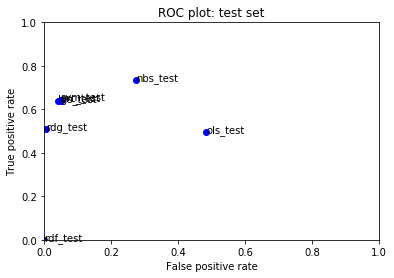

In [61]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [65]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='./data/toxiccomments_train.csv', my_random_seed=40, test=True)
print("Number of rows in the submission test set (should be 153,164): ")

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 8 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1     

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [66]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.49040239141197334


In [67]:
raw_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,punc_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,42,5
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,18,2
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42,3
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,112,3
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13,1


In [68]:
my_submission.head()

,id,prediction
0,0000997932d777bf,False
1,000103f0d9cfb60f,True
2,000113f07ec002fd,False
3,0001b41b1c6bb37e,True
4,0001d958c54c6e35,True


In [69]:
my_submission.shape

(159571, 2)

In [72]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('./data/toxiccomments_train.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation